In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
import sklearn
import random
import math
import tensorflow.keras.backend as K
import cv2

In [2]:
# Label dictionary
# No tumor = 0
# Tumor = 1

In [3]:
noTumors = os.listdir(path='../dataset/no/')
yesTumors = os.listdir(path='../dataset/yes/')

In [4]:
print('no:', len(noTumors))
print('yes:', len(yesTumors))

totalimages = noTumors + yesTumors

print('Test size (no): ', math.ceil((0.2 * len(noTumors))))
print('Test size (yes): ', math.ceil((0.2 * len(yesTumors))))

no: 98
yes: 155
Test size (no):  20
Test size (yes):  31


In [5]:
def readImg(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (32, 32))
    return img

In [6]:
trainImages = []
trainLabels = []
testImages = []
testLabels = []

archive = []

testNo = math.ceil(0.2 * len(noTumors))
testYes = math.ceil(0.2 * len(yesTumors))

while len(noTumors) > 0:
    if len(noTumors) < testNo:
        for i in noTumors:
            testLabels.append(0)
            testImages.append(readImg('../dataset/no/' + i))
        break

    choice = random.choice(noTumors)
    noTumors.remove(choice)
    trainImages.append(readImg('../dataset/no/' + choice))
    trainLabels.append(0)



while len(yesTumors) > 0:
    if len(yesTumors) < testYes:
        for i in yesTumors:
            testLabels.append(1)
            testImages.append(readImg('../dataset/yes/' + i))
        break
    
    choice = random.choice(yesTumors)
    yesTumors.remove(choice)
    trainImages.append(readImg('../dataset/yes/' + choice))
    trainLabels.append(1)

In [7]:
trainImages = np.squeeze(trainImages)
trainLabels = np.squeeze(trainLabels)
testImages = np.squeeze(testImages)
testLabels = np.squeeze(testLabels)

In [8]:
print('Train dataset length: ', len(trainImages))
print('Train label length: ', len(trainLabels))
print('Test dataset length: ', len(testImages))
print('Test label length: ', len(testLabels))

Train dataset length:  204
Train label length:  204
Test dataset length:  49
Test label length:  49


In [9]:
class_names = ['No Tumor', 'Tumor']

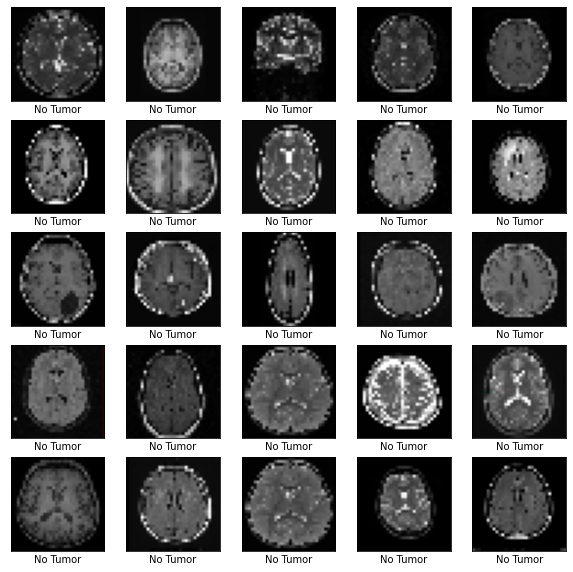

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()

In [11]:
trainImages = np.asarray(trainImages)
trainLabels = np.asarray(trainLabels).astype(np.int)
testImages = np.asarray(testImages)
testLabels = np.asarray(testLabels).astype(np.int)

# x = ten.Tensor(4,512,512)
# print(x.shape)
# y = [:3, :, :]
# print(y.shape)
# trainImages = trainImages.reshape(204, 1, 1)
# testImages = testImages.reshape(49, 1, 1)

# trainX = K.constant(trainImages)
# testX = K.constant(testImages)


In [12]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['acc'])

In [14]:
model.fit(trainImages,
         trainLabels,
         batch_size=128,
         epochs=150,
         validation_data=(testImages, testLabels),)

Epoch 1/150
2/2 [==============================] - 0s 100ms/step - loss: 0.8395 - acc: 0.4510 - val_loss: 0.6974 - val_acc: 0.4082
Epoch 2/150
2/2 [==============================] - 0s 42ms/step - loss: 0.7489 - acc: 0.5147 - val_loss: 0.6901 - val_acc: 0.5714
Epoch 3/150
2/2 [==============================] - 0s 42ms/step - loss: 0.7012 - acc: 0.5441 - val_loss: 0.6783 - val_acc: 0.5714
Epoch 4/150
2/2 [==============================] - 0s 41ms/step - loss: 0.7175 - acc: 0.5490 - val_loss: 0.6459 - val_acc: 0.6122
Epoch 5/150
2/2 [==============================] - 0s 41ms/step - loss: 0.6621 - acc: 0.6176 - val_loss: 0.7358 - val_acc: 0.4490
Epoch 6/150
2/2 [==============================] - 0s 39ms/step - loss: 0.7137 - acc: 0.5147 - val_loss: 0.6625 - val_acc: 0.6327
Epoch 7/150
2/2 [==============================] - 0s 39ms/step - loss: 0.7164 - acc: 0.5833 - val_loss: 0.6518 - val_acc: 0.6531
Epoch 8/150
2/2 [==============================] - 0s 39ms/step - loss: 0.7007 - acc: 0.5

In [15]:
score = model.evaluate(testImages, testLabels, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7551020383834839


In [16]:
labels =["Yes",  # index 1
        "No",      # index 0
        ]

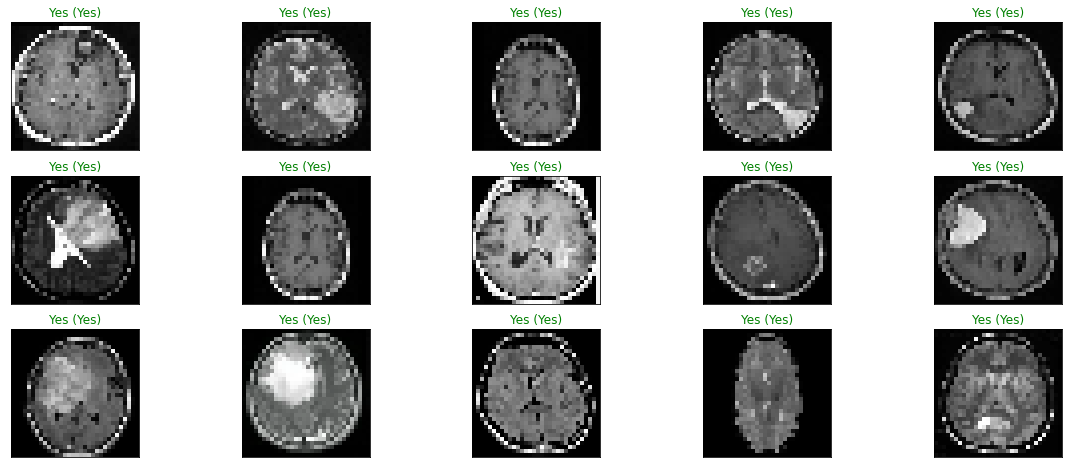

In [17]:
y_hat = model.predict(testImages)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(testImages.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(testImages[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(testLabels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()